In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [23]:
# Load the dataset
file_path = r"C:\Users\Saayan Chowdhury\Documents\COMPUTER\Naive Bayes\traffic.csv"
df = pd.read_csv(file_path)

# Show first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Print column names to understand dataset structure
print(df.columns)

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64
Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [21]:
# Convert DateTime to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Feature Engineering: Extract time-based features
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Weekday'] = df['DateTime'].dt.weekday
df['Peak_Hours'] = df['Hour'].apply(lambda x: 1 if 7 <= x <= 10 or 16 <= x <= 19 else 0)  # 7-10 AM & 4-7 PM

# Drop unnecessary columns
df = df.drop(['DateTime', 'ID'], axis=1)

# Define Traffic Congestion Levels
df['Traffic_Level'] = pd.cut(df['Vehicles'], bins=[0, 15, 50, 200], labels=['Low', 'Medium', 'High'])

# Drop original 'Vehicles' column
df = df.drop('Vehicles', axis=1)

# Encode target variable
encoder = LabelEncoder()
df['Traffic_Level'] = encoder.fit_transform(df['Traffic_Level'])

# Split dataset
X = df.drop('Traffic_Level', axis=1)
y = df['Traffic_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Traffic Prediction Accuracy: {accuracy:.2f}")


Naive Bayes Traffic Prediction Accuracy: 0.68


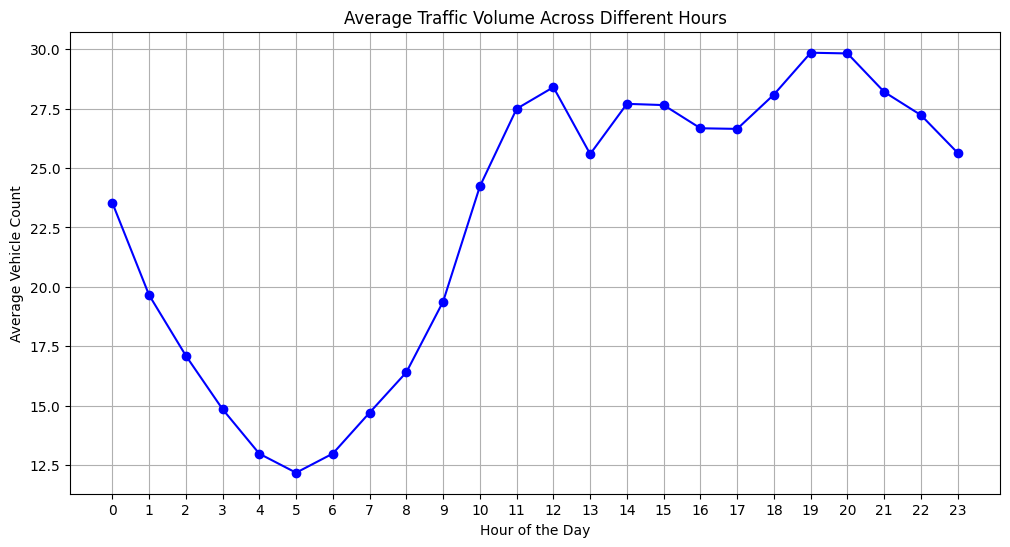

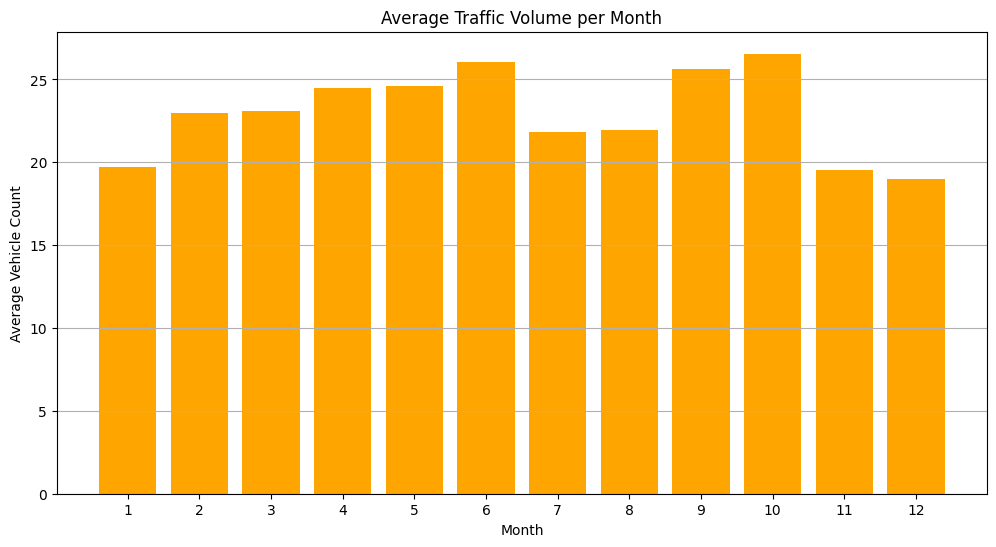

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset with encoding fixes
file_path = "C://Users//Saayan Chowdhury//Documents//COMPUTER//Naive Bayes//traffic.csv"

df = pd.read_csv(file_path, encoding='utf-8')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert 'DateTime' to proper datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract time-based features
df['Hour'] = df['DateTime'].dt.hour
df['Month'] = df['DateTime'].dt.month

# Line Plot: Traffic Volume Across Different Hours
plt.figure(figsize=(12, 6))
hourly_avg = df.groupby('Hour')['Vehicles'].mean()
plt.plot(hourly_avg.index, hourly_avg.values, marker="o", linestyle="-", color="b")
plt.title("Average Traffic Volume Across Different Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Vehicle Count")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Bar Graph: Monthly Traffic Trends
plt.figure(figsize=(12, 6))
monthly_avg = df.groupby('Month')['Vehicles'].mean()
plt.bar(monthly_avg.index, monthly_avg.values, color="orange")
plt.title("Average Traffic Volume per Month")
plt.xlabel("Month")
plt.ylabel("Average Vehicle Count")
plt.xticks(range(1, 13))
plt.grid(axis="y")
plt.show()
